## Bibliotecas

In [ ]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from google.colab import drive
import matplotlib.pyplot as plt
import csv

## Coleta de Dados

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Caminhos dos dados

In [ ]:
# Dados de votação
caminho_votacao = '/content/drive/My Drive/votacao_2022_GO.csv'

# Dados malha
caminho_malha = '/content/GO_Municipios_2022.zip'

# Dados censitários
caminho_censo = '/content/dados_censo.csv'

# Dados de perfil de eleitor
caminho_perfil = '/content/drive/My Drive/perfil_eleitor_secao_2022_GO.csv'

# Dados de segurança
caminho_seguranca = '/content/segurança.csv'

# Dados do PIB
caminho_pib = '/content/PIB dos Municípios GO.csv'

### Carregando os dados

In [ ]:
# DataFrame de votação
df_votacao = pd.read_csv(caminho_votacao, sep=';', encoding='latin-1')

In [ ]:
#GeoDataFrame da malha
df_malha = gpd.read_file(caminho_malha)

In [ ]:
# DataFrame do censo
df_censo = pd.read_csv(caminho_censo, sep=',')

In [ ]:
# DataFrame do perfil de eleitor
df_perfil = pd.read_csv(caminho_perfil, encoding='latin-1', sep=';')

In [ ]:
# DataFrame de seguranca
df_seguranca = pd.read_csv(caminho_seguranca, encoding='utf-8', sep=';')

In [ ]:
# DataFrame do PIB
df_pib = pd.read_csv(caminho_pib, sep=',')

## Análise dos dados - Analise Exploratoria


### Dados de Votação

In [ ]:
# Visualizando as primeiras linhas dos dados
df_votacao.head(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
0,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,336,3,GOVERNADOR,95,VOTO BRANCO,25,1554,-1,CMEI JESUINO VELOSO DO CARMO,"RUA JARBAS SANTIL DE ARAUJO, 600"
1,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,49,3,GOVERNADOR,95,VOTO BRANCO,4,1279,-1,ESCOLA ESTADUAL VILA SÃO JOSÉ,"RUA SANTA CRUZ, S/N,"
2,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,317,7,DEPUTADO ESTADUAL,28888,JOAO PEREIRA DA SILVA JUNIOR,1,1457,90001644176,COLEGIO ESTADUAL MARIA DE FATIMA SANTANA,RUA 34 QD.48 S/N


In [ ]:
# Verificando informações da base de dados
df_votacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082383 entries, 0 to 2082382
Data columns (total 26 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DT_GERACAO                 object
 1   HH_GERACAO                 object
 2   ANO_ELEICAO                int64 
 3   CD_TIPO_ELEICAO            int64 
 4   NM_TIPO_ELEICAO            object
 5   NR_TURNO                   int64 
 6   CD_ELEICAO                 int64 
 7   DS_ELEICAO                 object
 8   DT_ELEICAO                 object
 9   TP_ABRANGENCIA             object
 10  SG_UF                      object
 11  SG_UE                      object
 12  NM_UE                      object
 13  CD_MUNICIPIO               int64 
 14  NM_MUNICIPIO               object
 15  NR_ZONA                    int64 
 16  NR_SECAO                   int64 
 17  CD_CARGO                   int64 
 18  DS_CARGO                   object
 19  NR_VOTAVEL                 int64 
 20  NM_VOTAVEL              

In [ ]:
# Quantidade de Municípios
df_votacao['NM_MUNICIPIO'].nunique()

246

In [ ]:
# Cargos existentes no dataframe
df_votacao['DS_CARGO'].unique()

array(['GOVERNADOR', 'DEPUTADO ESTADUAL', 'SENADOR', 'DEPUTADO FEDERAL'],
      dtype=object)

In [ ]:
df_votacao[['NM_MUNICIPIO','QT_VOTOS']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
QT_VOTOS,2082383.0,7.313143,16.971569,1.0,1.0,2.0,5.0,277.0


### Dados da Malha

In [ ]:
df_malha.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    246 non-null    object  
 1   NM_MUN    246 non-null    object  
 2   SIGLA_UF  246 non-null    object  
 3   AREA_KM2  246 non-null    float64 
 4   geometry  246 non-null    geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 9.7+ KB


In [ ]:
df_malha.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,5200050,Abadia de Goiás,GO,143.357,"POLYGON ((-49.43754 -16.86015, -49.43849 -16.8..."
1,5200100,Abadiânia,GO,1044.555,"POLYGON ((-48.67246 -16.28556, -48.67248 -16.2..."
2,5200134,Acreúna,GO,1566.742,"POLYGON ((-50.07007 -17.48691, -50.06993 -17.4..."
3,5200159,Adelândia,GO,115.385,"POLYGON ((-50.17913 -16.43049, -50.17928 -16.4..."
4,5200175,Água Fria de Goiás,GO,2023.636,"POLYGON ((-47.85694 -14.76464, -47.85674 -14.7..."


In [ ]:
df_malha[['NM_MUN', 'AREA_KM2']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AREA_KM2,246.0,1383.101049,1651.371511,55.569,408.027,829.247,1730.76675,9846.293


In [ ]:
# Agrupar pelo nome do município e calcular a média da área
df_malha.groupby('NM_MUN')['AREA_KM2'].mean()

,AREA_KM2
NM_MUN,
Abadia de Goiás,143.357
Abadiânia,1044.555
Acreúna,1566.742
Adelândia,115.385
Alexânia,846.876
...,...
Vila Boa,1052.593
Vila Propício,2181.593
Água Fria de Goiás,2023.636


<Axes: >

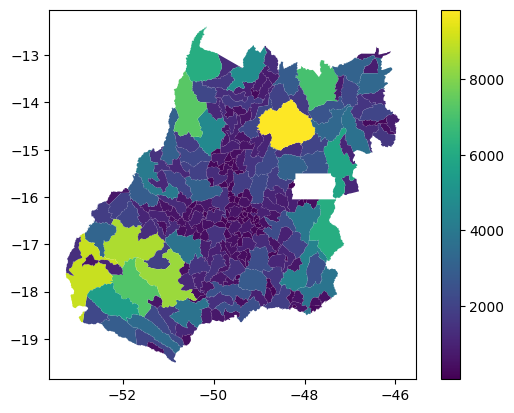

In [ ]:
# Visualizando a malha dos municípios de Goiás
df_malha.plot("AREA_KM2", legend=True)

### Dados do censo

In [ ]:
df_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_emprego         246 non-null    int64  
 1   idh                 245 non-null    float64
 2   municipio           245 non-null    object 
 3   cod_municipio       245 non-null    float64
 4   uf                  245 non-null    object 
 5   habitantes          245 non-null    float64
 6   taxa_alfabetizacao  245 non-null    float64
 7   homens              245 non-null    float64
 8   domicilios          245 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 17.4+ KB


In [ ]:
df_censo.head()

,num_emprego,idh,municipio,cod_municipio,uf,habitantes,taxa_alfabetizacao,homens,domicilios
0,2526,708.0,Abadia de Goiás,5200050.0,GO,19128.0,94.27,103.23,7866.0
1,2950,689.0,Abadiânia,5200100.0,GO,17232.0,92.76,104.56,10303.0
2,4065,686.0,Acreúna,5200134.0,GO,21568.0,90.70,104.24,9355.0
3,409,702.0,Adelândia,5200159.0,GO,2297.0,89.78,101.67,1250.0
4,1327,671.0,Água Fria de Goiás,5200175.0,GO,4954.0,89.07,109.83,2808.0


In [ ]:
df_censo[['idh', 'habitantes', 'domicilios', 'taxa_alfabetizacao']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
idh,245.0,694.836735,33.452037,584.00,677.0,697.00,718.00,799.00
habitantes,245.0,28663.848980,105094.408149,924.00,3545.0,7200.00,18108.00,1437366.00
domicilios,245.0,13045.408163,47018.213671,518.00,1968.0,3601.00,8391.00,655531.00
taxa_alfabetizacao,245.0,90.833347,3.053778,81.18,89.0,90.91,92.92,97.51


In [ ]:
df_censo[['idh', 'habitantes', 'domicilios', 'taxa_alfabetizacao']].median()

,0
idh,697.00
habitantes,7200.00
domicilios,3601.00
taxa_alfabetizacao,90.91


In [ ]:
# Verificando valores nulos ou ausentes
df_censo.isna().sum()

,0
num_emprego,0
idh,1
municipio,1
cod_municipio,1
uf,1
habitantes,1
taxa_alfabetizacao,1
homens,1
domicilios,1


In [ ]:
# Quantidade de municípios presentes no df
len(df_censo['municipio'].unique())

246

In [ ]:
# Verificando a existência de dados duplicados
censo_duplicados = df_censo.duplicated()
censo_duplicados.sum()

0

### Dados de perfil de eleitor

In [ ]:
df_perfil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502348 entries, 0 to 2502347
Data columns (total 23 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRICA       int64 
 7   DS_MUN_SIT_BIOMETRICA       object
 8   NR_ZONA                     int64 
 9   NR_SECAO                    int64 
 10  NR_LOCAL_VOTACAO            int64 
 11  CD_GENERO                   int64 
 12  DS_GENERO                   object
 13  CD_ESTADO_CIVIL             int64 
 14  DS_ESTADO_CIVIL             object
 15  CD_FAIXA_ETARIA             int64 
 16  DS_FAIXA_ETARIA             object
 17  CD_GRAU_ESCOLARIDADE        int64 
 18  DS_GRAU_ESCOLARIDADE        object
 19  QT_ELEITORES_PERFIL         int64 
 20  QT

In [ ]:
df_perfil.head(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRICA,DS_MUN_SIT_BIOMETRICA,NR_ZONA,NR_SECAO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,12/07/2022,08:31:45,2022,GO,92274,APARECIDA DE GOIÂNIA,1,Biométrico,119,61,...,1,SOLTEIRO,2529,25 a 29 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,1,0,0
1,12/07/2022,08:31:45,2022,GO,92274,APARECIDA DE GOIÂNIA,1,Biométrico,119,61,...,1,SOLTEIRO,2529,25 a 29 anos,5,ENSINO MÉDIO INCOMPLETO,9,9,0,0
2,12/07/2022,08:31:45,2022,GO,92274,APARECIDA DE GOIÂNIA,1,Biométrico,119,61,...,1,SOLTEIRO,2529,25 a 29 anos,6,ENSINO MÉDIO COMPLETO,9,9,0,0


In [ ]:
# Quantidade de municípios
df_perfil['NM_MUNICIPIO'].nunique()

246

In [ ]:
df_perfil['DS_GENERO'].unique()

array(['MASCULINO', 'FEMININO'], dtype=object)

In [ ]:
df_perfil['DS_ESTADO_CIVIL'].unique()

array(['SOLTEIRO', 'CASADO', 'VIÚVO', 'SEPARADO JUDICIALMENTE',
       'DIVORCIADO'], dtype=object)

In [ ]:
df_perfil['DS_FAIXA_ETARIA'].unique()

array(['25 a 29 anos                  ', '30 a 34 anos                  ',
       '35 a 39 anos                  ', '40 a 44 anos                  ',
       '45 a 49 anos                  ', '50 a 54 anos                  ',
       '55 a 59 anos                  ', '60 a 64 anos                  ',
       '65 a 69 anos                  ', '70 a 74 anos                  ',
       '21 a 24 anos                  ', '75 a 79 anos                  ',
       '90 a 94 anos                  ', '85 a 89 anos                  ',
       '17 anos                       ', '18 anos                       ',
       '19 anos                       ', '20 anos                       ',
       '80 a 84 anos                  ', '95 a 99 anos                  ',
       '16 anos                       ', '100 anos ou mais              ',
       'Inválido                      '], dtype=object)

In [ ]:
df_perfil['DS_GRAU_ESCOLARIDADE'].unique()

array(['ENSINO FUNDAMENTAL COMPLETO', 'ENSINO MÉDIO INCOMPLETO',
       'ENSINO MÉDIO COMPLETO', 'SUPERIOR INCOMPLETO',
       'ENSINO FUNDAMENTAL INCOMPLETO', 'LÊ E ESCREVE', 'ANALFABETO',
       'SUPERIOR COMPLETO'], dtype=object)

In [ ]:
df_perfil[['NM_MUNICIPIO', 'DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_FAIXA_ETARIA', 'DS_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
QT_ELEITORES_PERFIL,2502348.0,1.946314,1.872144,1.0,1.0,1.0,2.0,65.0


### Dados de segurança - Homicidios Dolosos



In [ ]:
df_seguranca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cidade              246 non-null    object 
 1   Homicidios Dolosos  165 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [ ]:
df_seguranca[['Cidade', 'Homicidios Dolosos']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Homicidios Dolosos,165.0,13.666667,42.300512,1.0,1.0,3.0,8.0,438.0


In [ ]:
df_seguranca.groupby('Cidade')['Homicidios Dolosos'].mean()

,Homicidios Dolosos
Cidade,
Abadia de Goiás,8.0
Abadiânia,9.0
Acreúna,3.0
Adelândia,NaN
Alexânia,18.0
...,...
Vila Boa,2.0
Vila Propício,1.0
Água Fria de Goiás,3.0


### Dados PIB dos municípios de GO

In [ ]:
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nm_municipio  246 non-null    object
 1   PIB           246 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [ ]:
df_pib.head()

,nm_municipio,PIB
0,Abadia de Goiás,353.700.292
1,Abadiânia,445.324.202
2,Acreúna,1.051.834.117
3,Adelândia,48.793.367
4,Água Fria de Goiás,533.232.876


## Tratamento dos dados

### Dados de Votação

In [ ]:
# Filtrando apenas registros de Deputado Federal
df_votacao_deputado = df_votacao[df_votacao['DS_CARGO'] == 'DEPUTADO FEDERAL']

In [ ]:
df_votacao_deputado.sample(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
798048,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,87,6,DEPUTADO FEDERAL,5122,HUMBERTO TEÓFILO DE MENEZES NETO,7,1023,90001650884,E.M. TANCREDO NEVES,AV BAHIA SN
1257574,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,20,6,DEPUTADO FEDERAL,96,VOTO NULO,9,1090,-1,COLEGIO ESTADUAL SAO MIGUEL DO ARAGUAIA / CESMA,RUA 06 S/N
327787,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,215,6,DEPUTADO FEDERAL,1414,GABRIELA RODART LOPES,3,1333,90001694942,ESCOLA MUNICIPAL MIGUEL PEDREIRO,RUA MORRINHOS SN


In [ ]:
# Verificando existência de dados duplicados
duplicados = df_votacao_deputado.duplicated()
duplicados.sum()

0

In [ ]:
# Quantidade de candidatos a Deputado Federal (tirando valores nulos (-1) e valores não preenchidos(-3))
len(df_votacao_deputado['SQ_CANDIDATO'].unique())

360

In [ ]:
# Novo DataFrame apenas com as colunas de interesse
df_votacao_2 = df_votacao_deputado.loc[:, ['CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO',
                                           'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO',
                                           'SQ_CANDIDATO', 'NM_LOCAL_VOTACAO', 'DS_LOCAL_VOTACAO_ENDERECO']]

In [ ]:
df_votacao_2.head(3)

,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
63,92215,ANÁPOLIS,3,466,1320,HILVANY ARAUJO PINHEIRO,1,1937,90001648109,ESCOLA MUNICIPAL CORA CORALINA,"RUA ILMA TIBURCIO BRAGA , S/N"
67,92215,ANÁPOLIS,141,259,9091,DAYANA MOREIRA GUIMARAES MARTINS,1,1449,90001715445,ESCOLA PRESBITERIANA FILADÉLFIA,RUA OPERÁRIO JOSÉ MIRANDA N.292
72,93076,CERES,72,88,9091,DAYANA MOREIRA GUIMARAES MARTINS,2,1023,90001715445,COLEGIO ESTADUAL HELIO VELOSO,PRACA CIVICA S/N


In [ ]:
df_votacao_2.tail(3)

,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
2082380,92274,APARECIDA DE GOIÂNIA,132,622,20,Partido Social Cristão,1,1953,-3,ESCOLA SENAI DR. CELSO CHARURI,"RUA BARITA, QD. 122, LT. 01/02"
2082381,92274,APARECIDA DE GOIÂNIA,132,622,21,Partido Comunista Brasileiro,1,1953,-3,ESCOLA SENAI DR. CELSO CHARURI,"RUA BARITA, QD. 122, LT. 01/02"
2082382,92274,APARECIDA DE GOIÂNIA,132,622,44,UNIÃO BRASIL,1,1953,-3,ESCOLA SENAI DR. CELSO CHARURI,"RUA BARITA, QD. 122, LT. 01/02"


Observação: A coluna 'NM_VOTAVEL' contém tanto os nomes dos candidatos quanto os nomes dos partidos.

In [ ]:
# Função para corrigir capitalização
def title_case_custom(text):
    words = text.split()
    return ' '.join([word.capitalize() if word.lower() not in ['de', 'da', 'do', 'e', 'em', 'a', 'o'] else word.lower() for word in words])

In [ ]:
# Convertendo nomes dos municípios em maiúsculo para minúsculo
df_votacao_2['NM_MUNICIPIO'] = df_votacao_2['NM_MUNICIPIO'].apply(title_case_custom)

In [ ]:
df_votacao_2.sample(3)

,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
906536,94897,Niquelândia,41,11,2290,PAULO CEZAR KRAUSPENHAR,1,1040,90001652519,ESCOLA ESTADUAL PAULO FRANCISCO DA SILVA,AVENIDA GOIAS SN
1231115,96733,Cachoeira Dourada,16,163,9090,EDUARDO DE SOUSA RODOVALHO,1,1031,90001715434,GRUPO ESCOLAR INACIO PINHEIRO PAES LEMES,AV GOIAS N 1200
360797,93955,Inhumas,13,5,2250,ALCIDES RIBEIRO FILHO,2,1023,90001652505,ESCOLA ESTADUAL JOÃO LOBO FILHO,"RUA 01, S/N"


SQ_CANDIDATO:
*   (-1) : voto nulo ou em branco
*   (-3) : partidos

In [ ]:
df_votacao_2[df_votacao_2['SQ_CANDIDATO'].isin([-1])].sample(3)

,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
170204,92339,Aragarças,35,85,96,VOTO NULO,9,1155,-1,CENTRO MUNICIPAL DE ENSINO FUNDAMENTAL SEBASTI...,RUA ORCELINA PARREIRA MATOS N 2973
1657697,92924,Chapadão do Céu,96,56,95,VOTO BRANCO,24,1015,-1,ESCOLA MUNICIPAL FLORES DO CERRADO,RUA PEIXE N. 399
278250,93734,Goiânia,1,52,95,VOTO BRANCO,12,1074,-1,COLEGIO SANTO AGOSTINHO,RUA 55 N 58 SETOR CENTRAL


In [ ]:
df_votacao_2[df_votacao_2['SQ_CANDIDATO'].isin([-3])].head(3)

,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
8880,96776,Santo Antônio do Descoberto,24,121,10,REPUBLICANOS,2,1244,-3,ESCOLA MUNICIPAL DE ENSINO FUNDAMENTAL DA LAGO...,FAZENDA LAGOINHA
8881,96776,Santo Antônio do Descoberto,24,121,12,Partido Democrático Trabalhista,1,1244,-3,ESCOLA MUNICIPAL DE ENSINO FUNDAMENTAL DA LAGO...,FAZENDA LAGOINHA
8882,96776,Santo Antônio do Descoberto,24,121,13,Partido dos Trabalhadores,4,1244,-3,ESCOLA MUNICIPAL DE ENSINO FUNDAMENTAL DA LAGO...,FAZENDA LAGOINHA


In [ ]:
# Agrupar por município e candidato, somando a quantidade de votos
votos_por_candidato_municipio = df_votacao_2.groupby(['CD_MUNICIPIO','NM_MUNICIPIO', 'NR_VOTAVEL', 'NM_VOTAVEL'])['QT_VOTOS'].sum().reset_index()

# Exibir as primeiras linhas do resultado
votos_por_candidato_municipio.sample(5)

,CD_MUNICIPIO,NM_MUNICIPIO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
24697,94471,Mairipotaba,1051,JOVAIR DE OLIVEIRA ARANTES,5
28323,95052,Ouro Verde de Goiás,5008,ALESSANDRA DE ABREU MINADAKIS BARBOSA,1
28648,95095,Padre Bernardo,4500,JOÃO REIS DE ARAÚJO,3
1157,92118,Alto Paraíso de Goiás,3677,VERA LUCIA COSTA FERREIRA,3
13755,93297,Crixás,1944,YURI BEN HUR DA ROCHA TEJOTA,15


In [ ]:
# Ordenar a tabela para ver os candidatos com mais votos em cada município
votos_por_candidato_municipio_sorted = votos_por_candidato_municipio.sort_values(by=['NM_MUNICIPIO', 'QT_VOTOS'], ascending=[True, False])

# Exibir as primeiras linhas do resultado ordenado
votos_por_candidato_municipio_sorted.head()

,CD_MUNICIPIO,NM_MUNICIPIO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
15221,93360,Abadia de Goiás,4444,SILVYE ALVES DA SILVA,1657
15098,93360,Abadia de Goiás,1111,ADRIANO ANTONIO AVELAR,1411
15162,93360,Abadia de Goiás,2210,GUSTAVO GAYER MACHADO DE ARAUJO,488
15225,93360,Abadia de Goiás,4480,ZACARIAS CALIL HAMU,439
15079,93360,Abadia de Goiás,95,VOTO BRANCO,370


In [ ]:
# Média da quantidade de votos por município
votos_por_candidato_municipio.groupby('NM_MUNICIPIO')['QT_VOTOS'].mean()

,QT_VOTOS
NM_MUNICIPIO,
Abadia de Goiás,39.733906
Abadiânia,43.144279
Acreúna,60.620513
Adelândia,19.224138
Alexânia,69.227468
...,...
Vila Boa,26.235849
Vila Propício,31.626984
Água Fria de Goiás,31.654545


In [ ]:
# Agrupar por município, somando a quantidade de votos
votos_por_municipio = df_votacao_2.groupby(['CD_MUNICIPIO','NM_MUNICIPIO'])['QT_VOTOS'].sum().reset_index()

# Exibir as primeiras linhas do resultado
votos_por_municipio.head()

,CD_MUNICIPIO,NM_MUNICIPIO,QT_VOTOS
0,92010,Abadiânia,8672
1,92029,Bonfinópolis,5525
2,92037,Água Limpa,1830
3,92053,Alexânia,16130
4,92061,Campos Verdes,3114


In [ ]:
# Agrupar pelos candidatos e somar os votos recebidos em todos os municípios
votos_por_candidato = df_votacao_2.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().reset_index()

# Exibir as primeiras linhas do resultado
votos_por_candidato.head()

,NM_VOTAVEL,QT_VOTOS
0,AAVA SANTIAGO AGUIAR,13387
1,ACENIL GUERRA DA COSTA,9073
2,ADALBERTO PEREIRA DA SILVA,65
3,ADELSON JOSÉ DE SOUZA,2157
4,ADEMILTON NUNES DA SILVA SANTOS,531


### Dados da Malha

In [ ]:
# Renomeando a coluna do código de município para facilitar a junção
df_malha.rename(columns={'CD_MUN': 'cod_municipio'}, inplace=True)

In [ ]:
df_malha.head(2)

,cod_municipio,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,5200050,Abadia de Goiás,GO,143.357,"POLYGON ((-49.43754 -16.86015, -49.43849 -16.8..."
1,5200100,Abadiânia,GO,1044.555,"POLYGON ((-48.67246 -16.28556, -48.67248 -16.2..."


### Dados do Censo

In [ ]:
# Preenchendo os valores Nan com -1
df_censo = df_censo.fillna(-1)

In [ ]:
df_censo.iloc[217:218, :]

,num_emprego,idh,municipio,cod_municipio,uf,habitantes,taxa_alfabetizacao,homens,domicilios
217,7970,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,-1.0


In [ ]:
# Convertendo as colunas de float para int
df_censo['idh'] = df_censo['idh'].astype(int)
df_censo['cod_municipio'] = df_censo['cod_municipio'].astype(int)
df_censo['habitantes'] = df_censo['habitantes'].astype(int)
df_censo['domicilios'] = df_censo['domicilios'].astype(int)

In [ ]:
df_censo.head()

,num_emprego,idh,municipio,cod_municipio,uf,habitantes,taxa_alfabetizacao,homens,domicilios
0,2526,708,Abadia de Goiás,5200050,GO,19128,94.27,103.23,7866
1,2950,689,Abadiânia,5200100,GO,17232,92.76,104.56,10303
2,4065,686,Acreúna,5200134,GO,21568,90.70,104.24,9355
3,409,702,Adelândia,5200159,GO,2297,89.78,101.67,1250
4,1327,671,Água Fria de Goiás,5200175,GO,4954,89.07,109.83,2808


### Dados de perfil de eleitor

In [ ]:
# Convertendo municípios em maiúsculo para minúsculo
df_perfil['NM_MUNICIPIO'] = df_perfil['NM_MUNICIPIO'].apply(title_case_custom)

In [ ]:
df_perfil.head(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRICA,DS_MUN_SIT_BIOMETRICA,NR_ZONA,NR_SECAO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,12/07/2022,08:31:45,2022,GO,92274,Aparecida de Goiânia,1,Biométrico,119,61,...,1,SOLTEIRO,2529,25 a 29 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,1,0,0
1,12/07/2022,08:31:45,2022,GO,92274,Aparecida de Goiânia,1,Biométrico,119,61,...,1,SOLTEIRO,2529,25 a 29 anos,5,ENSINO MÉDIO INCOMPLETO,9,9,0,0
2,12/07/2022,08:31:45,2022,GO,92274,Aparecida de Goiânia,1,Biométrico,119,61,...,1,SOLTEIRO,2529,25 a 29 anos,6,ENSINO MÉDIO COMPLETO,9,9,0,0


In [ ]:
# Excluindo colunas que não serão usadas
df_perfil = df_perfil.drop(columns=['DT_GERACAO','HH_GERACAO','ANO_ELEICAO','SG_UF','CD_MUN_SIT_BIOMETRICA','DS_MUN_SIT_BIOMETRICA','NR_LOCAL_VOTACAO','CD_GENERO','CD_ESTADO_CIVIL','CD_FAIXA_ETARIA','CD_GRAU_ESCOLARIDADE','QT_ELEITORES_BIOMETRIA'])

In [ ]:
df_perfil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502348 entries, 0 to 2502347
Data columns (total 11 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   CD_MUNICIPIO                int64 
 1   NM_MUNICIPIO                object
 2   NR_ZONA                     int64 
 3   NR_SECAO                    int64 
 4   DS_GENERO                   object
 5   DS_ESTADO_CIVIL             object
 6   DS_FAIXA_ETARIA             object
 7   DS_GRAU_ESCOLARIDADE        object
 8   QT_ELEITORES_PERFIL         int64 
 9   QT_ELEITORES_DEFICIENCIA    int64 
 10  QT_ELEITORES_INC_NM_SOCIAL  int64 
dtypes: int64(6), object(5)
memory usage: 210.0+ MB


In [ ]:
df_perfil.sample(3)

,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_GENERO,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
1639811,96776,Santo Antônio do Descoberto,24,121,MASCULINO,SOLTEIRO,25 a 29 anos,ENSINO FUNDAMENTAL INCOMPLETO,2,0,0
1783298,94714,Montes Claros de Goiás,79,112,MASCULINO,SOLTEIRO,30 a 34 anos,SUPERIOR INCOMPLETO,1,0,0
1322698,96091,Silvânia,31,49,FEMININO,CASADO,35 a 39 anos,SUPERIOR COMPLETO,2,0,0


### Dados do PIB

In [ ]:
# Removendo os pontos da coluna
df_pib['PIB'] = df_pib['PIB'].str.replace('.', '', regex=False)

In [ ]:
# Convertendo a coluna PIB de string para int
df_pib['PIB'] = df_pib['PIB'].astype(int)

In [ ]:
df_pib.groupby('nm_municipio')['PIB'].mean()

,PIB
nm_municipio,
Abadia de Goiás,3.537003e+08
Abadiânia,4.453242e+08
Acreúna,1.051834e+09
Adelândia,4.879337e+07
Alexânia,1.128054e+09
...,...
Vila Boa,1.798988e+07
Vila Propício,3.080130e+08
Água Fria de Goiás,5.332329e+08


## Análise dos DataFrames (Junções)

In [ ]:
# Junção dos DataFrames de censo e segurança
df_censo = pd.merge(df_seguranca, df_censo, left_on='Cidade', right_on='municipio', how='inner')

In [ ]:
# Junção dos DataFrames de censo e PIB
df_censo = pd.merge(df_pib, df_censo, left_on='nm_municipio', right_on='municipio', how='inner')

In [ ]:
# Junção dos DataFrames de votação e de censo
df_censo_votacao = pd.merge(votos_por_candidato_municipio, df_censo, left_on='NM_MUNICIPIO', right_on='municipio', how='inner')

In [ ]:
df_censo_votacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38852 entries, 0 to 38851
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CD_MUNICIPIO        38852 non-null  int64  
 1   NM_MUNICIPIO        38852 non-null  object 
 2   NR_VOTAVEL          38852 non-null  int64  
 3   NM_VOTAVEL          38852 non-null  object 
 4   QT_VOTOS            38852 non-null  int64  
 5   nm_municipio        38852 non-null  object 
 6   PIB                 38852 non-null  int64  
 7   Cidade              38852 non-null  object 
 8   Homicidios Dolosos  29477 non-null  float64
 9   num_emprego         38852 non-null  int64  
 10  idh                 38852 non-null  int64  
 11  municipio           38852 non-null  object 
 12  cod_municipio       38852 non-null  int64  
 13  uf                  38852 non-null  object 
 14  habitantes          38852 non-null  int64  
 15  taxa_alfabetizacao  38852 non-null  float64
 16  home

In [ ]:
df_censo_votacao.head(3)

,CD_MUNICIPIO,NM_MUNICIPIO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,nm_municipio,PIB,Cidade,Homicidios Dolosos,num_emprego,idh,municipio,cod_municipio,uf,habitantes,taxa_alfabetizacao,homens,domicilios
0,92010,Abadiânia,10,REPUBLICANOS,5,Abadiânia,445324202,Abadiânia,9.0,2950,689,Abadiânia,5200100,GO,17232,92.76,104.56,10303
1,92010,Abadiânia,11,PROGRESSISTAS,27,Abadiânia,445324202,Abadiânia,9.0,2950,689,Abadiânia,5200100,GO,17232,92.76,104.56,10303
2,92010,Abadiânia,12,Partido Democrático Trabalhista,21,Abadiânia,445324202,Abadiânia,9.0,2950,689,Abadiânia,5200100,GO,17232,92.76,104.56,10303


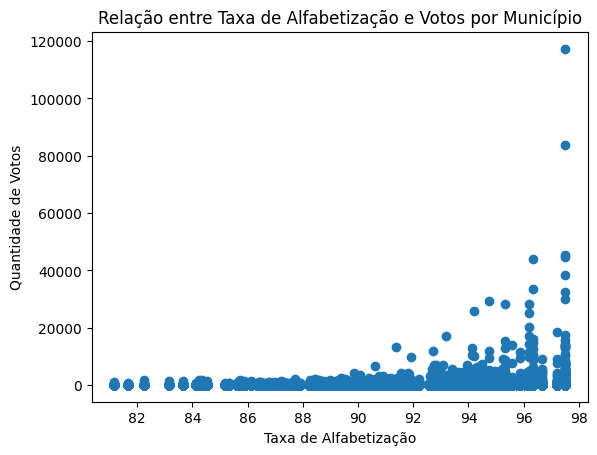

In [ ]:
# Relação entre Taxa de Alfabetização e Votos por Município
plt.scatter(df_censo_votacao['taxa_alfabetizacao'], df_censo_votacao['QT_VOTOS'])
plt.xlabel('Taxa de Alfabetização')
plt.ylabel('Quantidade de Votos')
plt.title('Relação entre Taxa de Alfabetização e Votos por Município')
plt.show()

In [ ]:
# Convertendo a coluna 'cod_municipio' de int para string
df_censo_votacao['cod_municipio'] = df_censo_votacao['cod_municipio'].astype(str)

In [ ]:
# Junção com dataframe da malha
df_votacao_geo = df_malha.merge(df_censo_votacao, on='cod_municipio')

In [ ]:
df_votacao_geo = df_votacao_geo.drop(['municipio', 'SIGLA_UF', 'uf'], axis=1)

In [ ]:
df_votacao_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 38852 entries, 0 to 38851
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   cod_municipio       38852 non-null  object  
 1   NM_MUN              38852 non-null  object  
 2   AREA_KM2            38852 non-null  float64 
 3   geometry            38852 non-null  geometry
 4   CD_MUNICIPIO        38852 non-null  int64   
 5   NM_MUNICIPIO        38852 non-null  object  
 6   NR_VOTAVEL          38852 non-null  int64   
 7   NM_VOTAVEL          38852 non-null  object  
 8   QT_VOTOS            38852 non-null  int64   
 9   nm_municipio        38852 non-null  object  
 10  PIB                 38852 non-null  int64   
 11  Cidade              38852 non-null  object  
 12  Homicidios Dolosos  29477 non-null  float64 
 13  num_emprego         38852 non-null  int64   
 14  idh                 38852 non-null  int64   
 15  habitantes          38852 no

In [ ]:
df_votacao_geo.head()

,cod_municipio,NM_MUN,AREA_KM2,geometry,CD_MUNICIPIO,NM_MUNICIPIO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,nm_municipio,PIB,Cidade,Homicidios Dolosos,num_emprego,idh,habitantes,taxa_alfabetizacao,homens,domicilios
0,5200050,Abadia de Goiás,143.357,"POLYGON ((-49.43754 -16.86015, -49.43849 -16.8...",93360,Abadia de Goiás,10,REPUBLICANOS,31,Abadia de Goiás,353700292,Abadia de Goiás,8.0,2526,708,19128,94.27,103.23,7866
1,5200050,Abadia de Goiás,143.357,"POLYGON ((-49.43754 -16.86015, -49.43849 -16.8...",93360,Abadia de Goiás,11,PROGRESSISTAS,21,Abadia de Goiás,353700292,Abadia de Goiás,8.0,2526,708,19128,94.27,103.23,7866
2,5200050,Abadia de Goiás,143.357,"POLYGON ((-49.43754 -16.86015, -49.43849 -16.8...",93360,Abadia de Goiás,12,Partido Democrático Trabalhista,12,Abadia de Goiás,353700292,Abadia de Goiás,8.0,2526,708,19128,94.27,103.23,7866
3,5200050,Abadia de Goiás,143.357,"POLYGON ((-49.43754 -16.86015, -49.43849 -16.8...",93360,Abadia de Goiás,13,Partido dos Trabalhadores,51,Abadia de Goiás,353700292,Abadia de Goiás,8.0,2526,708,19128,94.27,103.23,7866
4,5200050,Abadia de Goiás,143.357,"POLYGON ((-49.43754 -16.86015, -49.43849 -16.8...",93360,Abadia de Goiás,14,Partido Trabalhista Brasileiro,5,Abadia de Goiás,353700292,Abadia de Goiás,8.0,2526,708,19128,94.27,103.23,7866


Observação: os conteúdos de 'cod_municipio' e 'CD_MUNICIPIO' são diferentes.

In [ ]:
print(df_votacao_geo['QT_VOTOS'].describe())

count     38852.000000
mean         97.290564
std        1087.804811
min           1.000000
25%           2.000000
50%           5.000000
75%          20.000000
max      117297.000000
Name: QT_VOTOS, dtype: float64


<Axes: >

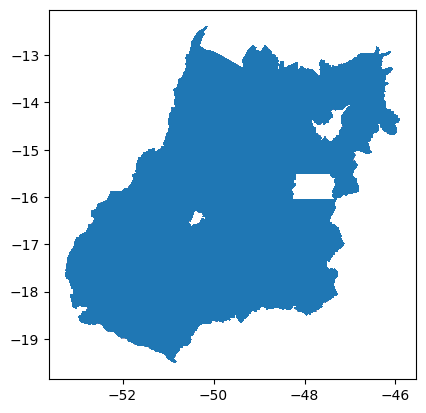

In [ ]:
df_votacao_geo.plot()

In [ ]:
# Ordenar os candidatos por votos recebidos de forma decrescente
votos_totais_por_candidato_geo = df_votacao_geo.sort_values(by='QT_VOTOS', ascending=False)

# Exibir as primeiras linhas do resultado ordenado
votos_totais_por_candidato_geo.head()

,cod_municipio,NM_MUN,SIGLA_UF,AREA_KM2,geometry,CD_MUNICIPIO,NM_MUNICIPIO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,num_emprego,idh,municipio,uf,habitantes,taxa_alfabetizacao,homens,domicilios
14772,5208707,Goiânia,GO,729.296,"POLYGON ((-49.19479 -16.69432, -49.19457 -16.6...",93734,Goiânia,4444,SILVYE ALVES DA SILVA,117297,643009,799,Goiânia,GO,1437366,97.51,90.01,655531
14657,5208707,Goiânia,GO,729.296,"POLYGON ((-49.19479 -16.69432, -49.19457 -16.6...",93734,Goiânia,2210,GUSTAVO GAYER MACHADO DE ARAUJO,83604,643009,799,Goiânia,GO,1437366,97.51,90.01,655531
14776,5208707,Goiânia,GO,729.296,"POLYGON ((-49.19479 -16.69432, -49.19457 -16.6...",93734,Goiânia,4480,ZACARIAS CALIL HAMU,45315,643009,799,Goiânia,GO,1437366,97.51,90.01,655531
14580,5208707,Goiânia,GO,729.296,"POLYGON ((-49.19479 -16.69432, -49.19457 -16.6...",93734,Goiânia,1331,ADRIANA SAUTHIER ACCORSI,44560,643009,799,Goiânia,GO,1437366,97.51,90.01,655531
3208,5201405,Aparecida de Goiânia,GO,279.954,"POLYGON ((-49.24361 -16.73365, -49.24315 -16.7...",92274,Aparecida de Goiânia,4444,SILVYE ALVES DA SILVA,43846,127259,718,Aparecida de Goiânia,GO,527796,96.33,96.21,216870


In [ ]:
import pandas as pd

# DataFrames simulados para exemplificar o código
# DataFrame 1: Votos do município
df_votos = pd.DataFrame({
    'municipios': ['Município A', 'Município B', 'Município C'],
    'votos_totais': [1200, 1500, 1100],
    'nome_do_votavel': ['Candidato X', 'Candidato Y', 'Candidato Z']
})

# DataFrame 2: Dados censitários por município
df_censitarios = pd.DataFrame({
    'Nome_do_município': ['Município A', 'Município B', 'Município C'],
    'Quantidade_de_empregos': [5000, 7000, 4500],
    'Índice_de_Desenvolvimento_Humano': [0.8, 0.75, 0.82],
    'Quantidade_de_habitantes': [20000, 25000, 18000],
    'Taxa_de_alfabetização': [0.95, 0.92, 0.96],
    'Homens_por_100_mulheres': [98, 102, 97],
    'Quantidade_de_domicílios': [6000, 7500, 5000]
})

# Função para gerar estatísticas básicas de um DataFrame
def gerar_estatisticas_basicas(df, colunas):
    """
    Gera estatísticas básicas para as colunas numéricas especificadas.

    :param df: DataFrame de entrada
    :param colunas: Lista de colunas para calcular estatísticas
    :return: DataFrame com as estatísticas básicas
    """
    estatisticas = df[colunas].describe().transpose()
    estatisticas['mediana'] = df[colunas].median()
    return estatisticas

# 1. Estatísticas para o DataFrame de votos
df_votos_estatisticas = gerar_estatisticas_basicas(df_votos, ['votos_totais'])
print("Estatísticas básicas - DataFrame de Votos")
print(df_votos_estatisticas)

# 2. Estatísticas para o DataFrame censitário
colunas_numericas_censitarias = [
    'Quantidade_de_empregos',
    'Índice_de_Desenvolvimento_Humano',
    'Quantidade_de_habitantes',
    'Taxa_de_alfabetização',
    'Homens_por_100_mulheres',
    'Quantidade_de_domicílios'
]
df_censitarios_estatisticas = gerar_estatisticas_basicas(df_censitarios, colunas_numericas_censitarias)
print("\nEstatísticas básicas - DataFrame Censitário")
print(df_censitarios_estatisticas)


Estatísticas básicas - DataFrame de Votos
              count         mean       std     min     25%     50%     75%  \
votos_totais    3.0  1266.666667  208.1666  1100.0  1150.0  1200.0  1350.0   

                 max  mediana  
votos_totais  1500.0   1200.0  

Estatísticas básicas - DataFrame Censitário
                                  count          mean          std       min  \
Quantidade_de_empregos              3.0   5500.000000  1322.875656   4500.00   
Índice_de_Desenvolvimento_Humano    3.0      0.790000     0.036056      0.75   
Quantidade_de_habitantes            3.0  21000.000000  3605.551275  18000.00   
Taxa_de_alfabetização               3.0      0.943333     0.020817      0.92   
Homens_por_100_mulheres             3.0     99.000000     2.645751     97.00   
Quantidade_de_domicílios            3.0   6166.666667  1258.305739   5000.00   

                                        25%       50%        75%       max  \
Quantidade_de_empregos             4750.000   5000.00

## Esquema OMT-G

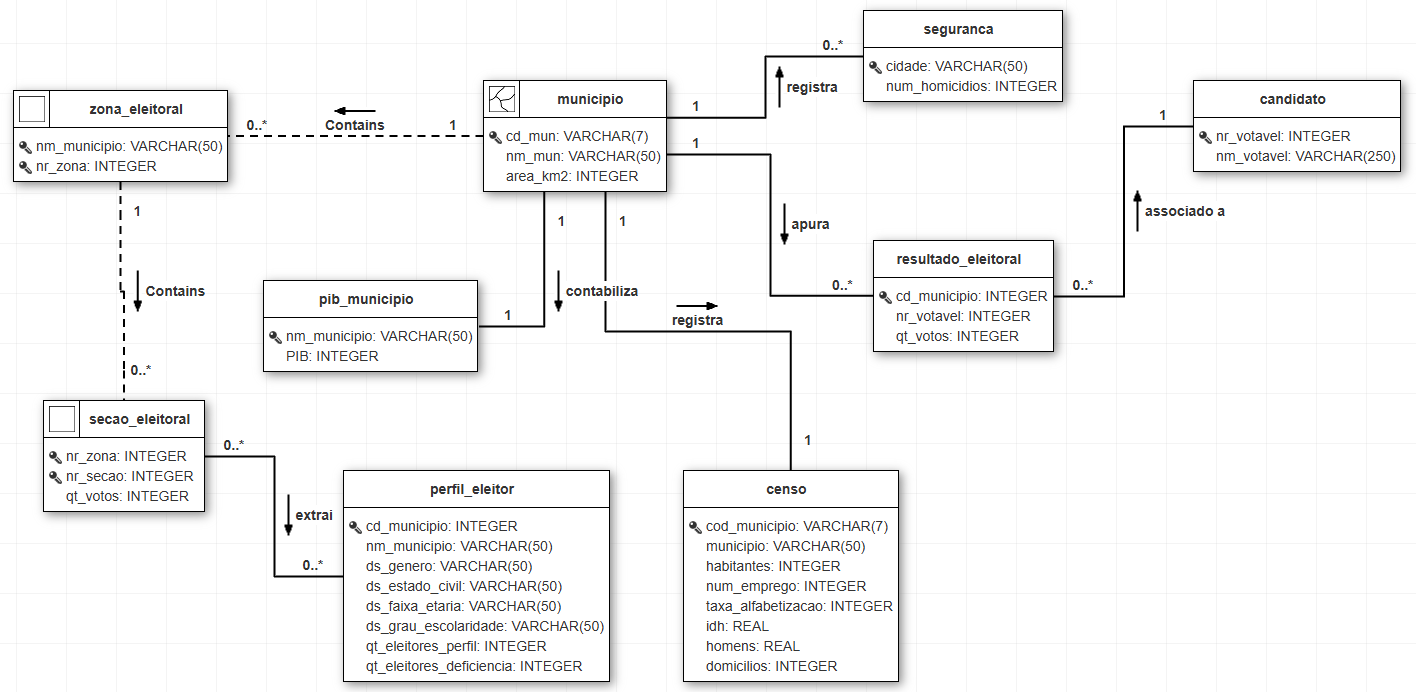